# Full dataset loading and complete training loop removed.
# Please fill out the request form to access the full code.

In [ ]:
import torch

print(f"PyTorch version: {torch.__version__}")

if torch.cuda.is_available():
    print("GPU is available!")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is not available.")


PyTorch version: 2.5.1
GPU is available!
Using GPU: NVIDIA GeForce RTX 4090


In [ ]:
import numpy as np

print(f"NumPy version: {np.__version__}")


NumPy version: 1.23.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold, train_test_split # cross validation split
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
!pip install matplotlib

  Using cached matplotlib-3.9.2-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.9.2-cp39-cp39-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl (211 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 5.2 MB/s eta 0:00:00
Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl (55 kB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


In [ ]:
!pip install pandas

  Using cached pandas-2.2.3-cp39-cp39-win_amd64.whl.metadata (19 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp39-cp39-win_amd64.whl (11.6 MB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)


In [ ]:
pip install scikit-learn

  Using cached scikit_learn-1.5.2-cp39-cp39-win_amd64.whl.metadata (13 kB)
  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp39-cp39-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install mat73

  Using cached h5py-3.12.1-cp39-cp39-win_amd64.whl.metadata (2.5 kB)
Using cached h5py-3.12.1-cp39-cp39-win_amd64.whl (3.0 MB)


In [ ]:
import mat73

# بارگذاری داده‌های موجود در فایل Part_1.mat
data_dict = mat73.loadmat('D:/haniehmohammadi/Part_1.mat')

# بارگذاری و ادغام داده‌های موجود در فایل‌های Part_2.mat تا Part_4.mat
for i in range(2, 5):
    file_name = f'D:/haniehmohammadi/Part_{i}.mat'
    data = mat73.loadmat(file_name)
    data_dict['Part_1'].extend(data[f'Part_{i}'])

In [ ]:
num_matrices = len(data_dict['Part_1'])
print(num_matrices)

12000


Full dataset loading and complete training loop removed.
Please fill out the request form to access the full code.

In [ ]:
# Create empty lists to store the separate signals
ppg_list = []
abp_list = []
ecg_list = []

# Loop through each matrix in the data
for matrix in new_variable:
    # Extract the signals from the matrix
    ppg_signal = matrix[0]
    abp_signal = matrix[1]
    ecg_signal = matrix[2]

    # Append each signal to its respective list
    ppg_list.append(ppg_signal)
    abp_list.append(abp_signal)
    ecg_list.append(ecg_signal)

In [ ]:
num_matrices = len(ppg_list)
print(num_matrices)

12000


Full dataset loading and complete training loop removed.
Please fill out the request form to access the full code.

In [ ]:
num_matrices = len(filtered_signals_ppg)
print(num_matrices)

2064


Full dataset loading and complete training loop removed.
Please fill out the request form to access the full code.

In [ ]:
len(ppg1[0][0])

1024

In [ ]:
import torch

def segment_signal_torch(signal, sampling_rate, window_size, step_size):
    signal = torch.tensor(signal, device='cuda')  # Ensure signal is a CUDA tensor
    window_samples = int(window_size * sampling_rate)
    step_samples = int(step_size * sampling_rate)
    num_segments = (len(signal) - window_samples) // step_samples + 1
    segments = [signal[i:i+window_samples] for i in range(0, num_segments * step_samples, step_samples)]
    return torch.stack(segments)  # Returns a stacked tensor of all segments

# Ensure that your data (abp signals) are on GPU
abp1 = []
for abp in filtered_signals_abp:
    abp_tensor = torch.tensor(abp, device='cuda')  # Convert each ABP signal to a CUDA tensor
    signal_segment = segment_signal_torch(abp_tensor, sampling_rate=125, window_size=8.192, step_size=2.048)
    abp1.append(signal_segment)

C:\Users\user\AppData\Local\Temp\ipykernel_14088\3726764745.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  signal = torch.tensor(signal, device='cuda')  # Ensure signal is a CUDA tensor


In [ ]:
all_abp = torch.cat(abp1, dim=0)

In [ ]:
all_abp.shape

torch.Size([539719, 1024])

In [ ]:
all_ppg = torch.cat(ppg1, dim=0)

In [ ]:
all_ppg.shape

torch.Size([539719, 1024])

In [ ]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


Full dataset loading and complete training loop removed.
Please fill out the request form to access the full code.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Subset
from sklearn.model_selection import KFold, train_test_split
import numpy as np
import scipy.signal

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class AttentionLayer(nn.Module):
...

class CNN_LSTM_Model(nn.Module):
...


    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = self.relu(self.bn3(self.conv3(x)))
        x = self.pool(x)

        # Pass through the new layers
        x = self.relu(self.bn4(self.conv4(x)))
        x = self.pool(x)
        x = self.relu(self.bn5(self.conv5(x)))
        x = self.pool(x)

        x = self.relu(self.bn6(self.conv6(x)))
        x = self.pool(x)

        x = x.permute(0, 2, 1)  # reshape for LSTM (batch_size, seq_len, input_size)

        x, _ = self.lstm1(x)
        x = self.dropout(x)
        x, _ = self.lstm2(x)
        x = self.dropout(x)

        x = self.attention(x)
        x = self.fc(x)
        return x

def calculate_metrics(outputs, targets):
    mae = torch.mean(torch.abs(outputs - targets)).item()
    rmse = torch.sqrt(torch.mean((outputs - targets) ** 2)).item()
    error_vector = outputs - targets
    std = torch.sqrt(torch.mean((error_vector - torch.mean(error_vector)) ** 2)).item()
    return mae, rmse, std

def extract_features(abp_segments):
    sbps = []
    dbps = []
    maps = []

    for segment in abp_segments:
        segment = segment.cpu().numpy()

        peaks, _ = scipy.signal.find_peaks(segment, height=np.max(segment) * 0.7)  # Example parameter adjustment
        # troughs, _ = scipy.signal.find_peaks(-segment)
        # محاسبه مقدار height برای دره‌ها
        min_val = np.min(segment)
        height_val = -min_val * 0.7
        if np.isnan(height_val) or np.isinf(height_val) or height_val <= 0:
            height_val = None  # مقدار پیش‌فرض

        # پیدا کردن دره‌ها با مقدار height محاسبه شده
        troughs, _ = scipy.signal.find_peaks(-segment, height=height_val)

        if len(peaks) == 0 or len(troughs) == 0:
            print("No peaks or troughs found, skipping segment.")
            continue

        sbp = segment[peaks].max()  # Use max value for SBP
        dbp = segment[troughs].min()  # Use min value for DBP
        map_val = np.trapz(segment) / len(segment)  # Use area under the curve for MAP

        sbps.append(sbp)
        dbps.append(dbp)
        maps.append(map_val)

    sbps = torch.tensor(sbps, device=device)
    dbps = torch.tensor(dbps, device=device)
    maps = torch.tensor(maps, device=device)

    return sbps, dbps, maps


# Preparing the data
x = all_ppg.reshape(all_ppg.shape[0], 1, -1)  # Reshape correctly to [batch_size, 1, sequence_length]
y = all_abp.reshape(all_abp.shape[0], -1)  # Reshape correctly to [batch_size, sequence_length]

# Create a dataset (on CPU)
dataset = TensorDataset(torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32))

# Define the k-fold cross validator
k_folds = 5
kfold = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Array to store the fold results
results = []

# Arrays to store training, validation, and test losses and MAEs for all folds
all_train_losses = []
all_val_losses = []
all_test_losses = []
all_train_maes = []
all_val_maes = []
all_test_maes = []

# Arrays to store true values and predictions for Bland-Altman plots
all_true_values = []
all_predictions = []

# Training the model
num_epochs = 700
patience = 60

test_maes = []

for fold, (train_val_ids, test_ids) in enumerate(kfold.split(dataset)):
    print(f'FOLD {fold}')
    print('--------------------------------')

    # Split train_val into train and validation
    train_val_subsampler = Subset(dataset, train_val_ids)
    test_subsampler = Subset(dataset, test_ids)

    train_ids, val_ids = train_test_split(train_val_ids, test_size=0.1, random_state=42)
    train_subsampler = Subset(dataset, train_ids)
    val_subsampler = Subset(dataset, val_ids)

    # Define data loaders for training, validation, and test
    train_loader = DataLoader(train_subsampler, batch_size=128, shuffle=True)
    val_loader = DataLoader(val_subsampler, batch_size=128, shuffle=False)
    test_loader = DataLoader(test_subsampler, batch_size=128, shuffle=False)

    # Initialize the model, loss function, optimizer, and learning rate scheduler
    model = CNN_LSTM_Model().to(device)
    criterion = nn.MSELoss().to(device)
    mae_criterion = nn.L1Loss().to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.5, verbose=True)

    best_loss = float('inf')
    patience_counter = 0

    train_losses = []
    val_losses = []
    train_maes = []
    val_maes = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_mae = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)  # Move to GPU
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            train_mae += torch.mean(torch.abs(outputs - targets)).item() * inputs.size(0)

        train_loss /= len(train_loader.dataset)
        train_mae /= len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        val_mae = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)  # Move to GPU
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                mae_loss = mae_criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)
                val_mae += mae_loss.item() * inputs.size(0)

        val_loss /= len(val_loader.dataset)
        val_mae /= len(val_loader.dataset)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_maes.append(train_mae)
        val_maes.append(val_mae)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}, Val Loss: {val_loss:.4f}, Val MAE: {val_mae:.4f}')

        scheduler.step(val_loss)

        if val_loss < best_loss:
            best_loss = val_loss
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': val_loss,
            }, f'best_model_fold_{fold}.pth')
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping")
            break

    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)
    all_train_maes.append(train_maes)
    all_val_maes.append(val_maes)

    # Evaluate the model on the test set
    checkpoint = torch.load(f'best_model_fold_{fold}.pth', weights_only=True)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    model.eval()
    test_loss = 0.0
    test_mae = 0.0
    true_values = []
    predictions = []

    true_sbps = []
    true_dbps = []
    true_maps = []

    pred_sbps = []
    pred_dbps = []
    pred_maps = []

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)  # Move to GPU
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            mae_loss = mae_criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
            test_mae += mae_loss.item() * inputs.size(0)

            # Extract true and predicted SBP, DBP, and MAP
            true_sbp, true_dbp, true_map = extract_features(targets)
            pred_sbp, pred_dbp, pred_map = extract_features(outputs)

            true_sbps.extend(true_sbp.cpu().numpy())
            true_dbps.extend(true_dbp.cpu().numpy())
            true_maps.extend(true_map.cpu().numpy())

            pred_sbps.extend(pred_sbp.cpu().numpy())
            pred_dbps.extend(pred_dbp.cpu().numpy())
            pred_maps.extend(pred_map.cpu().numpy())

            true_values.extend(targets.cpu().numpy())
            predictions.extend(outputs.cpu().numpy())

    test_loss /= len(test_loader.dataset)
    test_mae /= len(test_loader.dataset)

    all_true_values.append(true_values)
    all_predictions.append(predictions)

    # Ensure lengths are consistent before calculating metrics
    if len(pred_sbps) == len(true_sbps):
        mae_sbp = np.mean(np.abs(np.array(pred_sbps) - np.array(true_sbps)))
        std_sbp = np.std(np.abs(np.array(pred_sbps) - np.array(true_sbps)))
    elif len(pred_sbps) > len(true_sbps):
        pred_sbps = pred_sbps[:len(true_sbps)]  # Trim pred_sbps to match true_sbps
        mae_sbp = np.mean(np.abs(np.array(pred_sbps) - np.array(true_sbps)))
        std_sbp = np.std(np.abs(np.array(pred_sbps) - np.array(true_sbps)))
    elif len(true_sbps) > len(pred_sbps):
        true_sbps = true_sbps[:len(pred_sbps)]  # Trim true_sbps to match pred_sbps
        mae_sbp = np.mean(np.abs(np.array(pred_sbps) - np.array(true_sbps)))
        std_sbp = np.std(np.abs(np.array(pred_sbps) - np.array(true_sbps)))
    else:
        mae_sbp = None
        std_sbp = None
        print("Mismatch in SBP length, skipping SBP metric calculation.")

    if len(pred_dbps) == len(true_dbps):
        mae_dbp = np.mean(np.abs(np.array(pred_dbps) - np.array(true_dbps)))
        std_dbp = np.std(np.abs(np.array(pred_dbps) - np.array(true_dbps)))
    elif len(pred_dbps) > len(true_dbps):
        pred_dbps = pred_dbps[:len(true_dbps)]  # Trim pred_dbps to match true_dbps
        mae_dbp = np.mean(np.abs(np.array(pred_dbps) - np.array(true_dbps)))
        std_dbp = np.std(np.abs(np.array(pred_dbps) - np.array(true_dbps)))
    elif len(true_dbps) > len(pred_dbps):
        true_dbps = true_dbps[:len(pred_dbps)]  # Trim true_dbps to match pred_dbps
        mae_dbp = np.mean(np.abs(np.array(pred_dbps) - np.array(true_dbps)))
        std_dbp = np.std(np.abs(np.array(pred_dbps) - np.array(true_dbps)))
    else:
        mae_dbp = None
        std_dbp = None
        print("Mismatch in DBP length, skipping DBP metric calculation.")

    if len(pred_maps) == len(true_maps):
        mae_map = np.mean(np.abs(np.array(pred_maps) - np.array(true_maps)))
        std_map = np.std(np.abs(np.array(pred_maps) - np.array(true_maps)))
    elif len(pred_maps) > len(true_maps):
        pred_maps = pred_maps[:len(true_maps)]  # Trim pred_maps to match true_maps
        mae_map = np.mean(np.abs(np.array(pred_maps) - np.array(true_maps)))
        std_map = np.std(np.abs(np.array(pred_maps) - np.array(true_maps)))
    elif len(true_maps) > len(pred_maps):
        true_maps = true_maps[:len(pred_maps)]  # Trim true_maps to match pred_maps
        mae_map = np.mean(np.abs(np.array(pred_maps) - np.array(true_maps)))
        std_map = np.std(np.abs(np.array(pred_maps) - np.array(true_maps)))
    else:
        mae_map = None
        std_map = None
        print("Mismatch in MAP length, skipping MAP metric calculation.")

    print(f'Fold {fold}, Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}')
    test_maes.append(test_mae)
    print(f'SBP MAE: {mae_sbp:.4f} ± {std_sbp:.4f}')
    print(f'DBP MAE: {mae_dbp:.4f} ± {std_dbp:.4f}')
    print(f'MAP MAE: {mae_map:.4f} ± {std_map:.4f}')

    results.append((test_loss, test_mae, mae_sbp, std_sbp, mae_dbp, std_dbp, mae_map, std_map))

# Print the results for all folds
print('--------------------------------')
print('K-FOLD CROSS VALIDATION RESULTS')
print('--------------------------------')

avg_test_loss = np.mean([r[0] for r in results])
avg_test_mae = np.mean([r[1] for r in results])
avg_mae_sbp = np.mean([r[2] for r in results])
avg_std_sbp = np.mean([r[3] for r in results])
avg_mae_dbp = np.mean([r[4] for r in results])
avg_std_dbp = np.mean([r[5] for r in results])
avg_mae_map = np.mean([r[6] for r in results])
avg_std_map = np.mean([r[7] for r in results])

print(f'Average Test Loss: {avg_test_loss:.4f}')
print(f'Average Test MAE: {avg_test_mae:.4f}')
print(f'Average SBP MAE: {avg_mae_sbp:.4f} ± {avg_std_sbp:.4f}')
print(f'Average DBP MAE: {avg_mae_dbp:.4f} ± {avg_std_dbp:.4f}')
print(f'Average MAP MAE: {avg_mae_map:.4f} ± {avg_std_map:.4f}')

Using device: cuda
FOLD 0
--------------------------------


C:\Users\user\AppData\Local\Temp\ipykernel_3416\1063119245.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = TensorDataset(torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32))
C:\Users\user\anaconda3\envs\haniemhammadi\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/1000, Train Loss: 766.2141, Train MAE: 21.0886, Val Loss: 594.9776, Val MAE: 19.3813
Epoch 2/1000, Train Loss: 591.5995, Train MAE: 19.3026, Val Loss: 595.7805, Val MAE: 19.2343
Epoch 3/1000, Train Loss: 588.6707, Train MAE: 19.2464, Val Loss: 567.5364, Val MAE: 18.4894
Epoch 4/1000, Train Loss: 525.1820, Train MAE: 18.1768, Val Loss: 495.0164, Val MAE: 17.3572
Epoch 5/1000, Train Loss: 456.3855, Train MAE: 16.7896, Val Loss: 398.3839, Val MAE: 15.2730
Epoch 6/1000, Train Loss: 301.1796, Train MAE: 13.1595, Val Loss: 221.1243, Val MAE: 11.2118
Epoch 7/1000, Train Loss: 187.9726, Train MAE: 10.1192, Val Loss: 155.4184, Val MAE: 9.0902
Epoch 8/1000, Train Loss: 140.2216, Train MAE: 8.5726, Val Loss: 128.7976, Val MAE: 8.1075
Epoch 9/1000, Train Loss: 113.2054, Train MAE: 7.6104, Val Loss: 98.4460, Val MAE: 7.0109
Epoch 10/1000, Train Loss: 96.1201, Train MAE: 6.9668, Val Loss: 82.5789, Val MAE: 6.3386
Epoch 11/1000, Train Loss: 85.1793, Train MAE: 6.5245, Val Loss: 73.4228, Val M

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# نمایش لیست فونت‌های موجود
from matplotlib import font_manager
for font in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    print(font)

# تنظیمات فونت (اگر Times New Roman موجود نباشد، از 'serif' استفاده می‌کنیم)
font_name = 'Times New Roman'
if font_name not in [f.name for f in font_manager.fontManager.ttflist]:
    font_name = 'serif'

matplotlib.rc('font', family=font_name, size=14)

C:\Windows\Fonts\corbelb.ttf
C:\Windows\Fonts\trebuc.ttf
C:\Windows\Fonts\malgun.ttf
C:\Windows\Fonts\framdit.ttf
C:\Windows\Fonts\verdanai.ttf
C:\Windows\Fonts\Candara.ttf
C:\Windows\Fonts\ariblk.ttf
C:\Windows\Fonts\segoeuii.ttf
C:\Windows\Fonts\LeelaUIb.ttf
C:\Windows\Fonts\msuighub.ttf
C:\Windows\Fonts\timesbi.ttf
C:\Windows\Fonts\arial.ttf
C:\Windows\Fonts\calibril.ttf
C:\Windows\Fonts\ariali.ttf
C:\Windows\Fonts\seguisb.ttf
C:\Windows\Fonts\cambriab.ttf
C:\Windows\Fonts\cambriaz.ttf
C:\Windows\Fonts\arialbd.ttf
C:\Windows\Fonts\calibrili.ttf
C:\Windows\Fonts\arialbi.ttf
C:\Windows\Fonts\corbell.ttf
C:\Windows\Fonts\segoeuib.ttf
C:\Windows\Fonts\symbol.ttf
C:\Windows\Fonts\NirmalaB.ttf
C:\Windows\Fonts\simpbdo.ttf
C:\Windows\Fonts\segoeuiz.ttf
C:\Windows\Fonts\segoeuil.ttf
C:\Windows\Fonts\georgiaz.ttf
C:\Windows\Fonts\tradbdo.ttf
C:\Windows\Fonts\Candaral.ttf
C:\Windows\Fonts\Candarai.ttf
C:\Windows\Fonts\majalla.ttf
C:\Windows\Fonts\webdings.ttf
C:\Windows\Fonts\msgothic.ttc
C:\

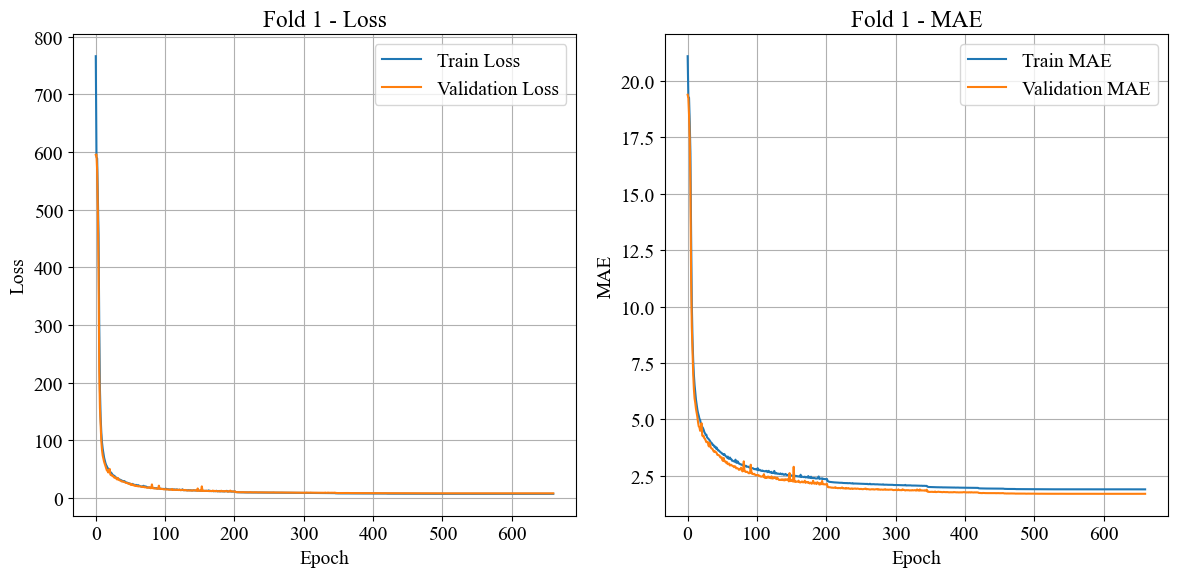

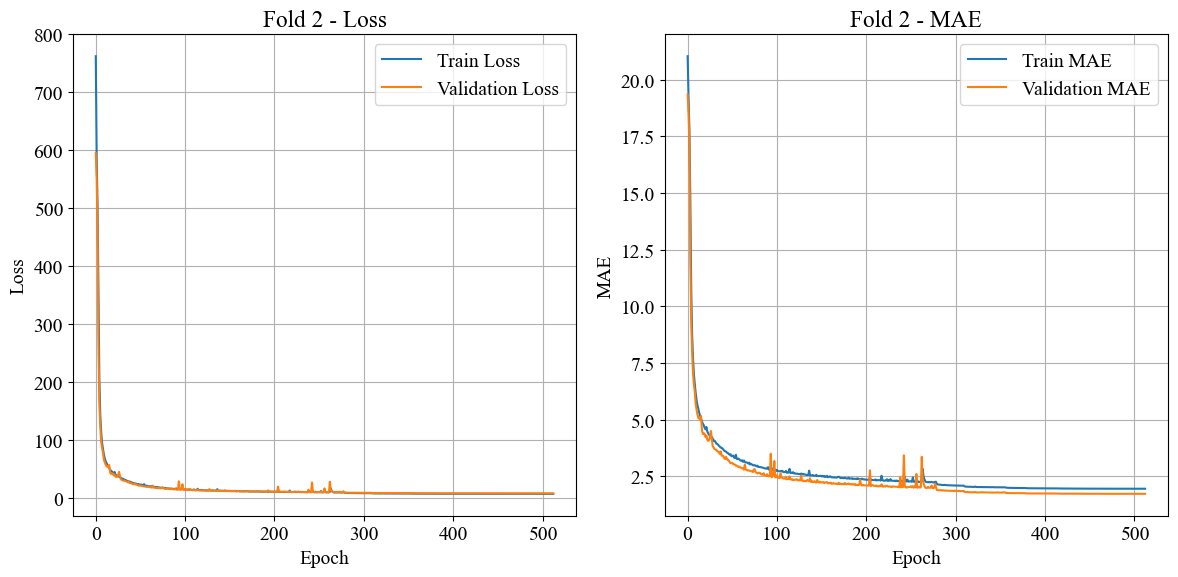

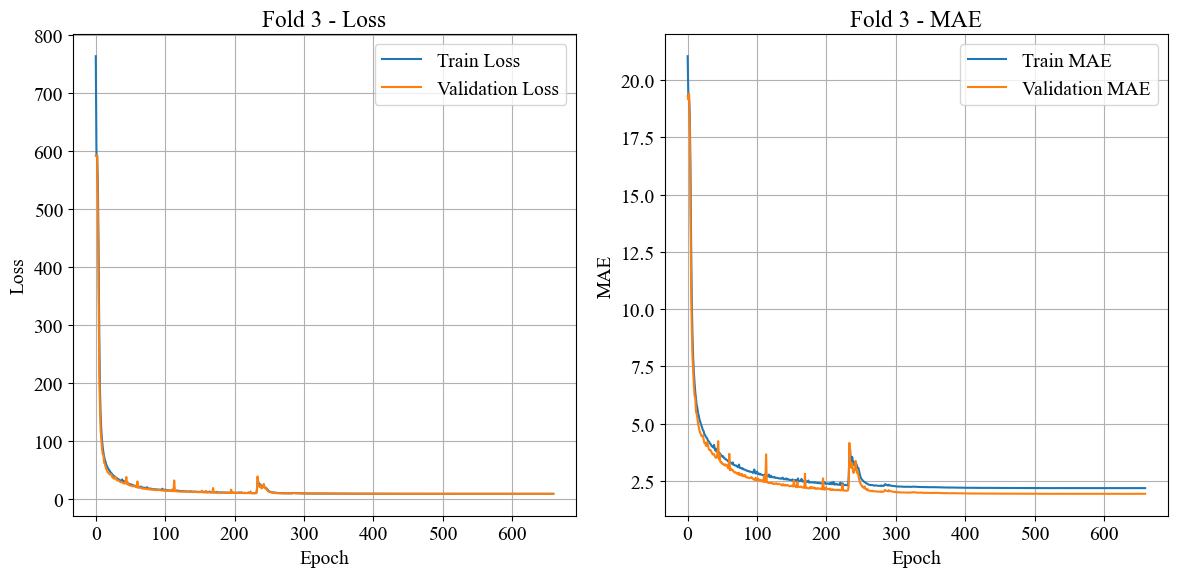

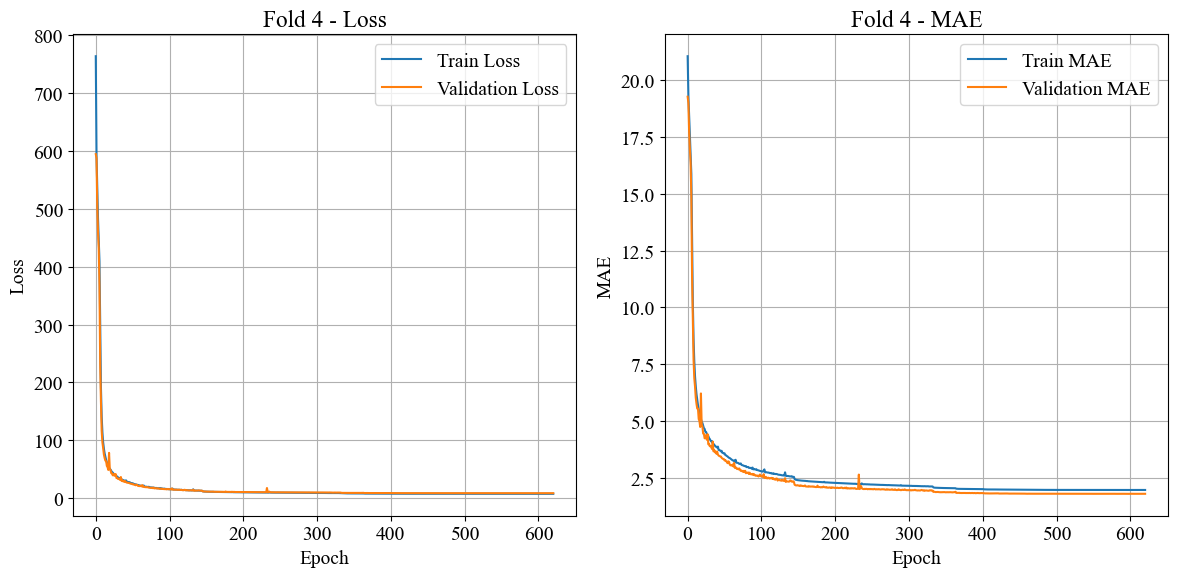

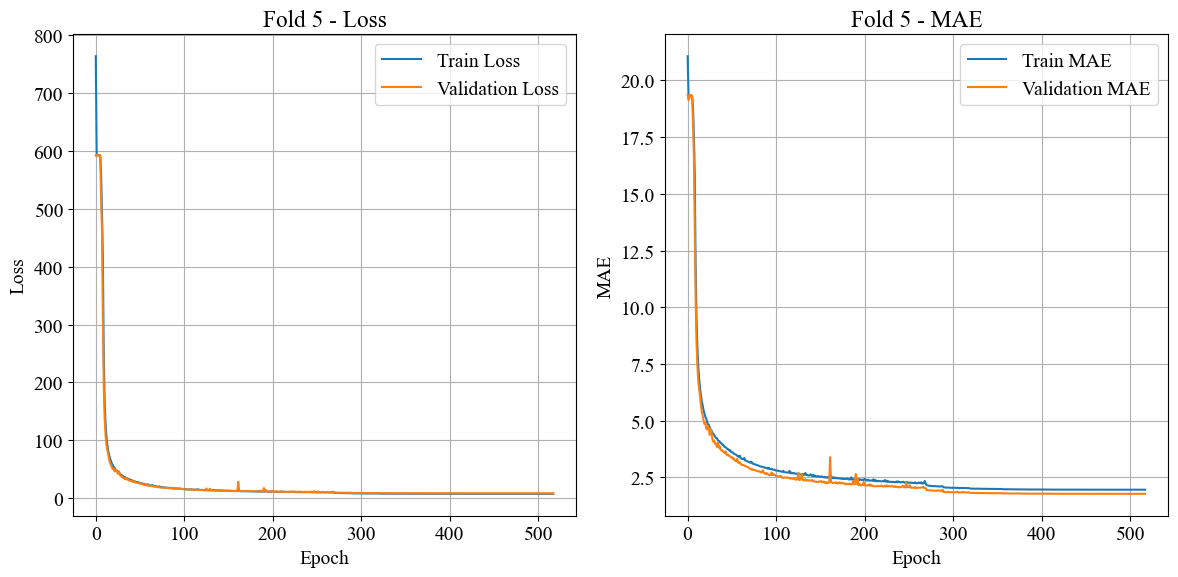

In [ ]:
def plot_loss_mae_combined(all_train_losses, all_val_losses, all_train_maes, all_val_maes):
    for i in range(len(all_train_losses)):
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.plot(all_train_losses[i], label='Train Loss')
        plt.plot(all_val_losses[i], label='Validation Loss')
        plt.title(f'Fold {i+1} - Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.subplot(1, 2, 2)
        plt.plot(all_train_maes[i], label='Train MAE')
        plt.plot(all_val_maes[i], label='Validation MAE')
        plt.title(f'Fold {i+1} - MAE')
        plt.xlabel('Epoch')
        plt.ylabel('MAE')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.savefig(f'Fold_{i+1}_Loss_MAE.png', dpi=300)
        plt.show()

plot_loss_mae_combined(all_train_losses, all_val_losses, all_train_maes, all_val_maes)

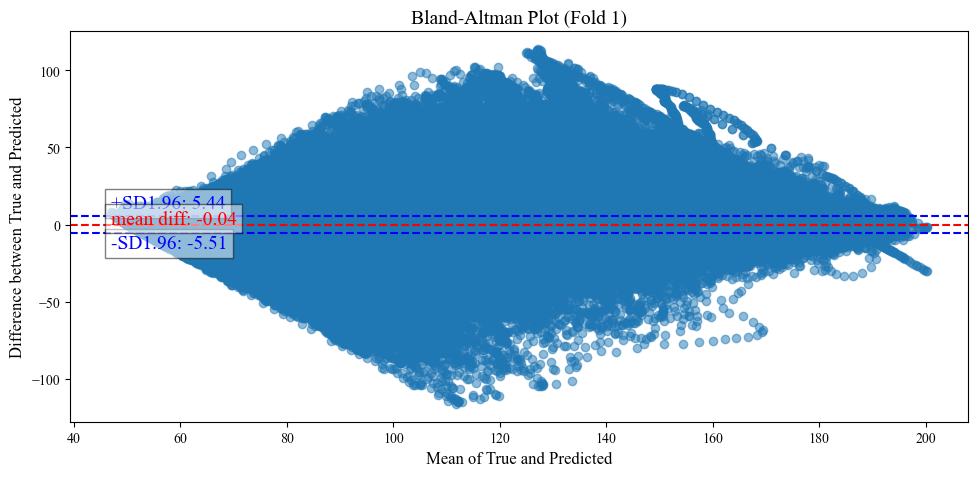

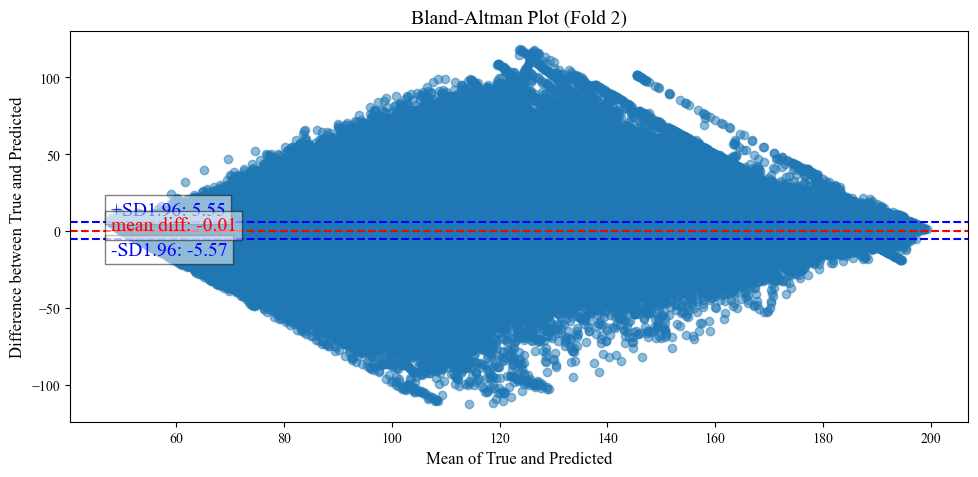

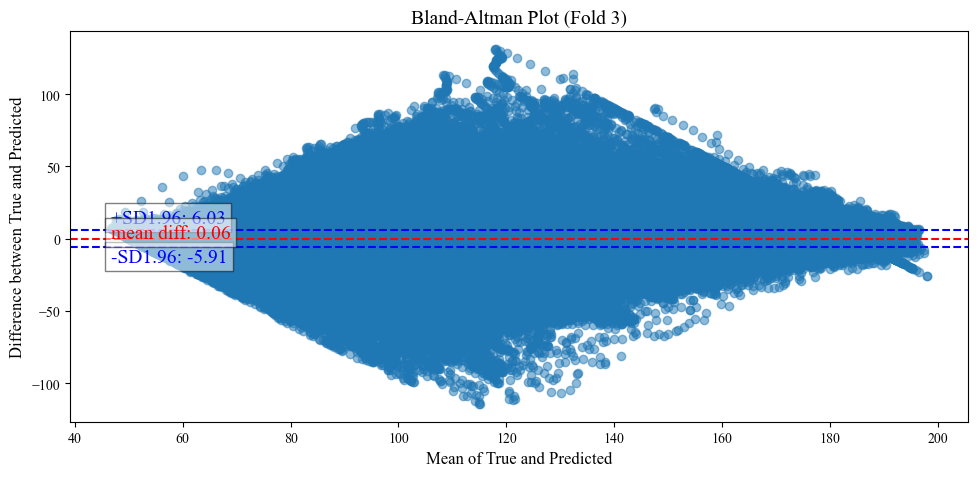

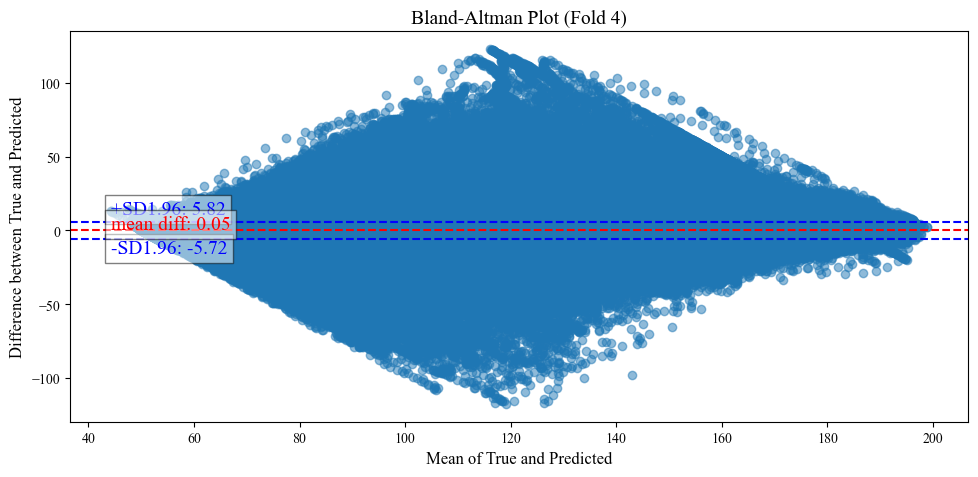

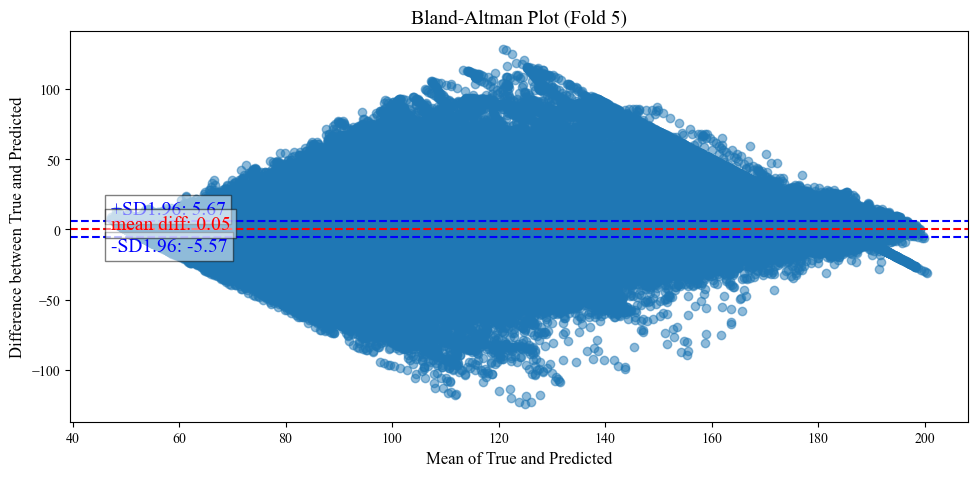

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# بررسی و اصلاح داده‌ها
for i in range(len(all_true_values)):
    true_values = np.array(all_true_values[i])
    predictions = np.array(all_predictions[i])

    if true_values.shape != predictions.shape:
        print(f"Mismatch in shapes at fold {i+1}: true_values shape {true_values.shape}, predictions shape {predictions.shape}")
        # تغییر شکل predictions به شکل (N,) به جای (N, 1)
        predictions = predictions.flatten()
        all_predictions[i] = predictions

def bland_altman_plot(true_values, predictions, fold):
    true_values = np.array(true_values)
    predictions = np.array(predictions)
    mean = np.mean([true_values, predictions], axis=0)
    diff = true_values - predictions
    md = np.mean(diff)
    sd = np.std(diff)

    plt.figure(figsize=(10, 5))
    plt.scatter(mean, diff, alpha=0.5)
    plt.axhline(md, color='red', linestyle='--')
    plt.axhline(md + 1.96*sd, color='blue', linestyle='--')
    plt.axhline(md - 1.96*sd, color='blue', linestyle='--')
    plt.title(f'Bland-Altman Plot (Fold {fold})', fontsize=14)
    plt.xlabel('Mean of True and Predicted', fontsize=12)
    plt.ylabel('Difference between True and Predicted', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # اضافه کردن متنی برای نمایش میانگین و انحراف معیار با فاصله مناسب
    plt.text(np.min(mean), md + 1.96*sd + 5, f'+SD1.96: {md + 1.96*sd:.2f}', color='blue', bbox=dict(facecolor='white', alpha=0.5))
    plt.text(np.min(mean), md - 1.96*sd - 10, f'-SD1.96: {md - 1.96*sd:.2f}', color='blue', bbox=dict(facecolor='white', alpha=0.5))
    plt.text(np.min(mean), md + 0.5, f'mean diff: {md:.2f}', color='red', bbox=dict(facecolor='white', alpha=0.5))

    plt.tight_layout()  # برای جلوگیری از قطع شدن برچسب‌ها
    plt.savefig(f'Bland_Altman_Fold_{fold}.png', dpi=300)
    plt.show()

# رسم نمودارهای Bland-Altman برای تمام فولدها
for i in range(k_folds):
    bland_altman_plot(all_true_values[i], all_predictions[i], i+1)

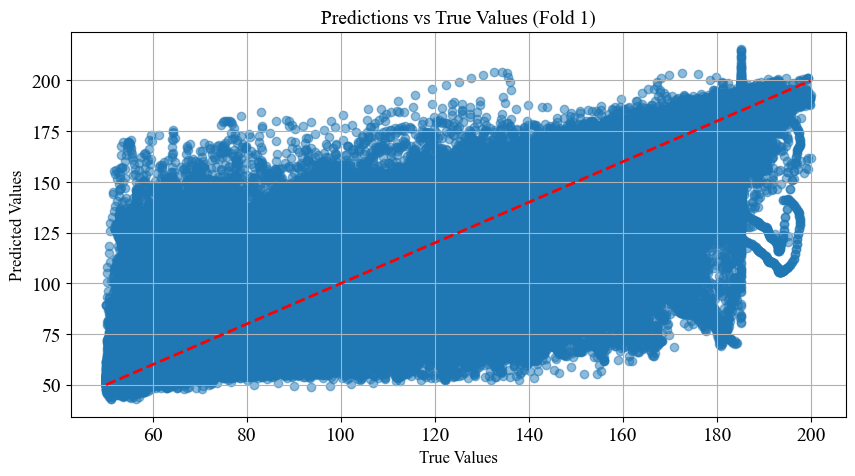

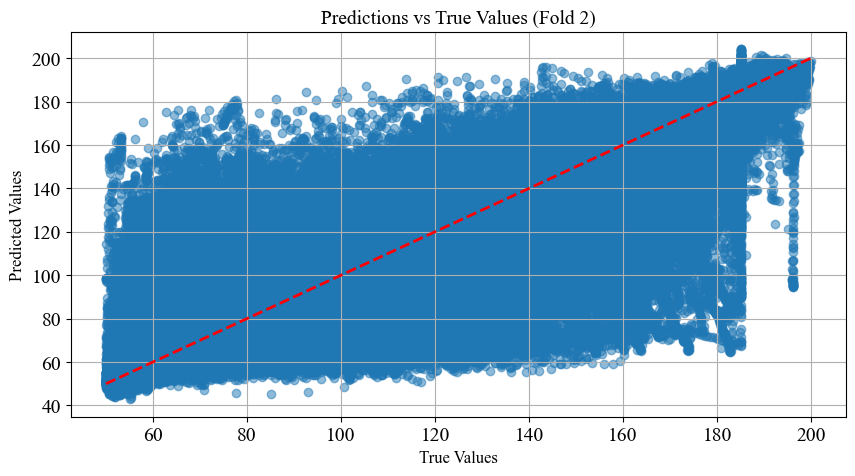

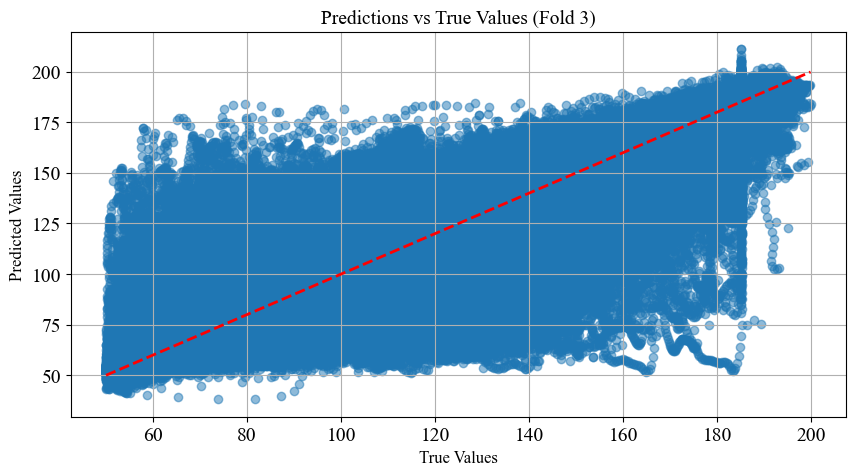

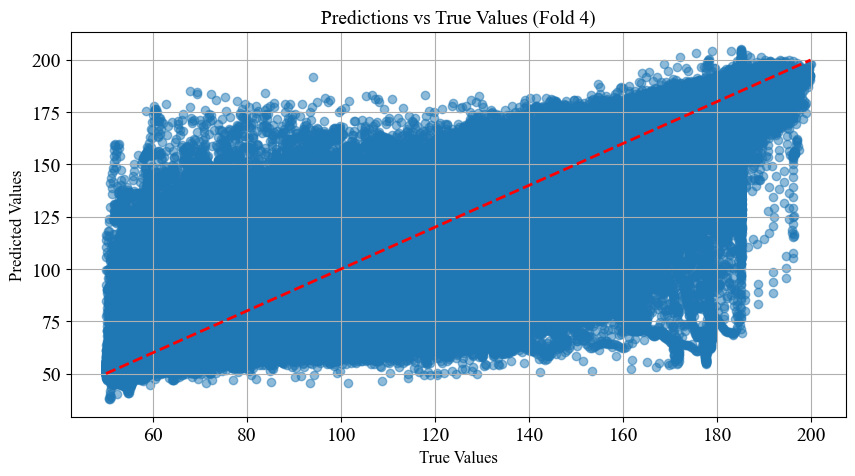

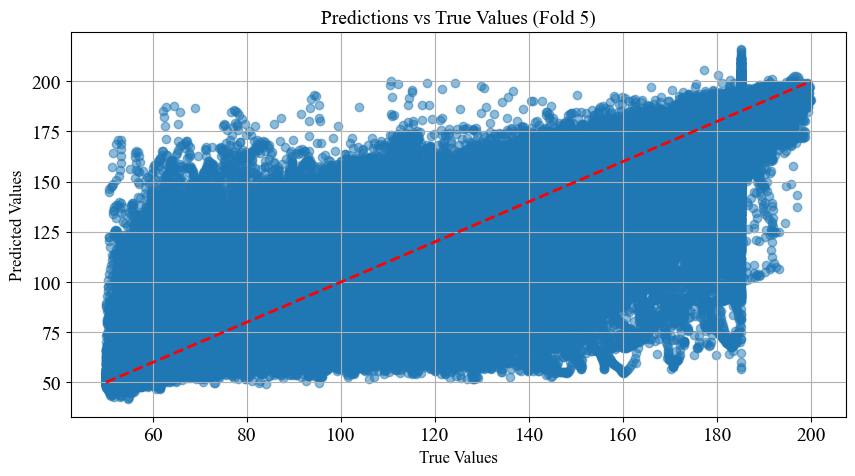

In [ ]:
def plot_predictions_vs_true(all_true_values, all_predictions, fold):
    true_values = np.concatenate(all_true_values)
    predictions = np.concatenate(all_predictions)

    plt.figure(figsize=(10, 5))
    plt.scatter(true_values, predictions, alpha=0.5)
    plt.plot([true_values.min(), true_values.max()], [true_values.min(), true_values.max()], 'r--', lw=2)
    plt.title(f'Predictions vs True Values (Fold {fold})', fontsize=14)
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.grid(True)
    plt.savefig(f'Predictions_vs_True_Fold_{fold}.png', dpi=300)
    plt.show()

# رسم نمودار پراکندگی برای تمام فولدها
for i in range(k_folds):
    plot_predictions_vs_true([all_true_values[i]], [all_predictions[i]], i+1)

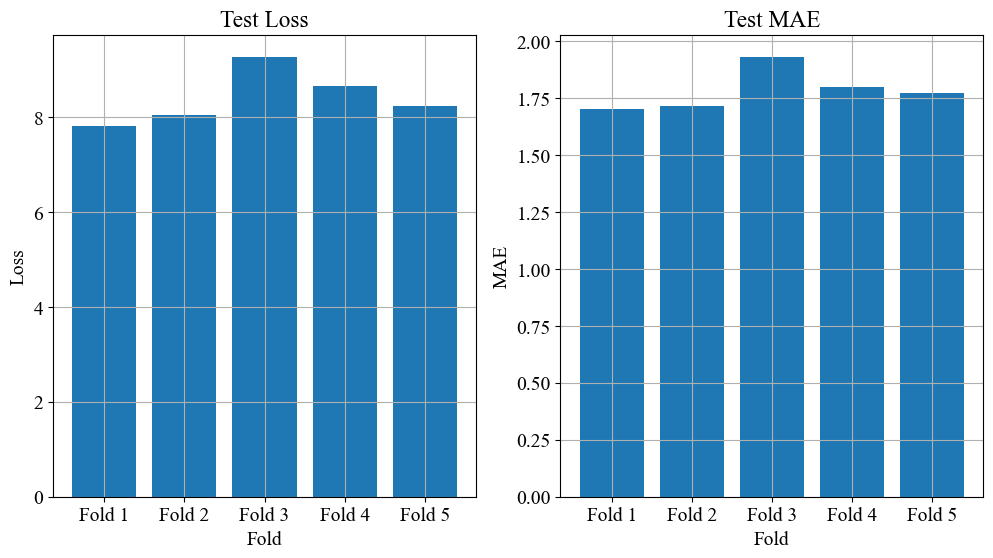

In [ ]:
import matplotlib.pyplot as plt

# Assuming the all_test_losses and all_test_maes are collected from the k-fold results
all_test_losses = [result[0] for result in results]
all_test_maes = [result[1] for result in results]

# Plot test results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(len(all_test_losses)), all_test_losses, tick_label=[f'Fold {i+1}' for i in range(len(all_test_losses))])
plt.title('Test Loss')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.grid(True)
plt.savefig('Test_Loss.png', dpi=300)

plt.subplot(1, 2, 2)
plt.bar(range(len(all_test_maes)), all_test_maes, tick_label=[f'Fold {i+1}' for i in range(len(all_test_maes))])
plt.title('Test MAE')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.grid(True)
plt.savefig('Test_MAE.png', dpi=300)

plt.show()